## Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

## Loading Train Data

In [ ]:
train_orginal = pd.read_csv("/content/train data.csv")
train = train_orginal
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Looking into the number of rows and number of columns of train dataset
train.shape

(614, 13)

Here the train dataset have 614 rows and 13 columns

In [ ]:
# Read the name of columns in dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Loading Test Data

In [ ]:
test = pd.read_csv("/content/test data.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.shape

(367, 12)

For test dataset, the no of rows is 367 and no of columns is 12

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
#Print the datatypes for train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory Data Analysis and Preprocessing

## Univariate Analysis

In [ ]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: title={'center': 'Loan Status Bar Plot'}, xlabel='Loan Status', ylabel='Loan Status Count'>

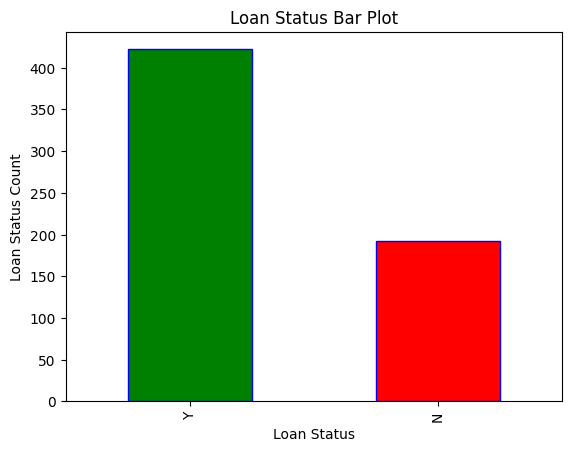

In [ ]:
#Add title and axis names
plt.title('Loan Status Bar Plot')
plt.xlabel('Loan Status')
plt.ylabel('Loan Status Count')
train['Loan_Status'].value_counts().plot.bar(color=['green','red'], edgecolor='blue')

### Lets visualize other features of the data set by graph and get the analysis. Study of categorical features such as Gender, Married, Self_Employed and Credit_History

<Axes: title={'center': 'Credit History'}>

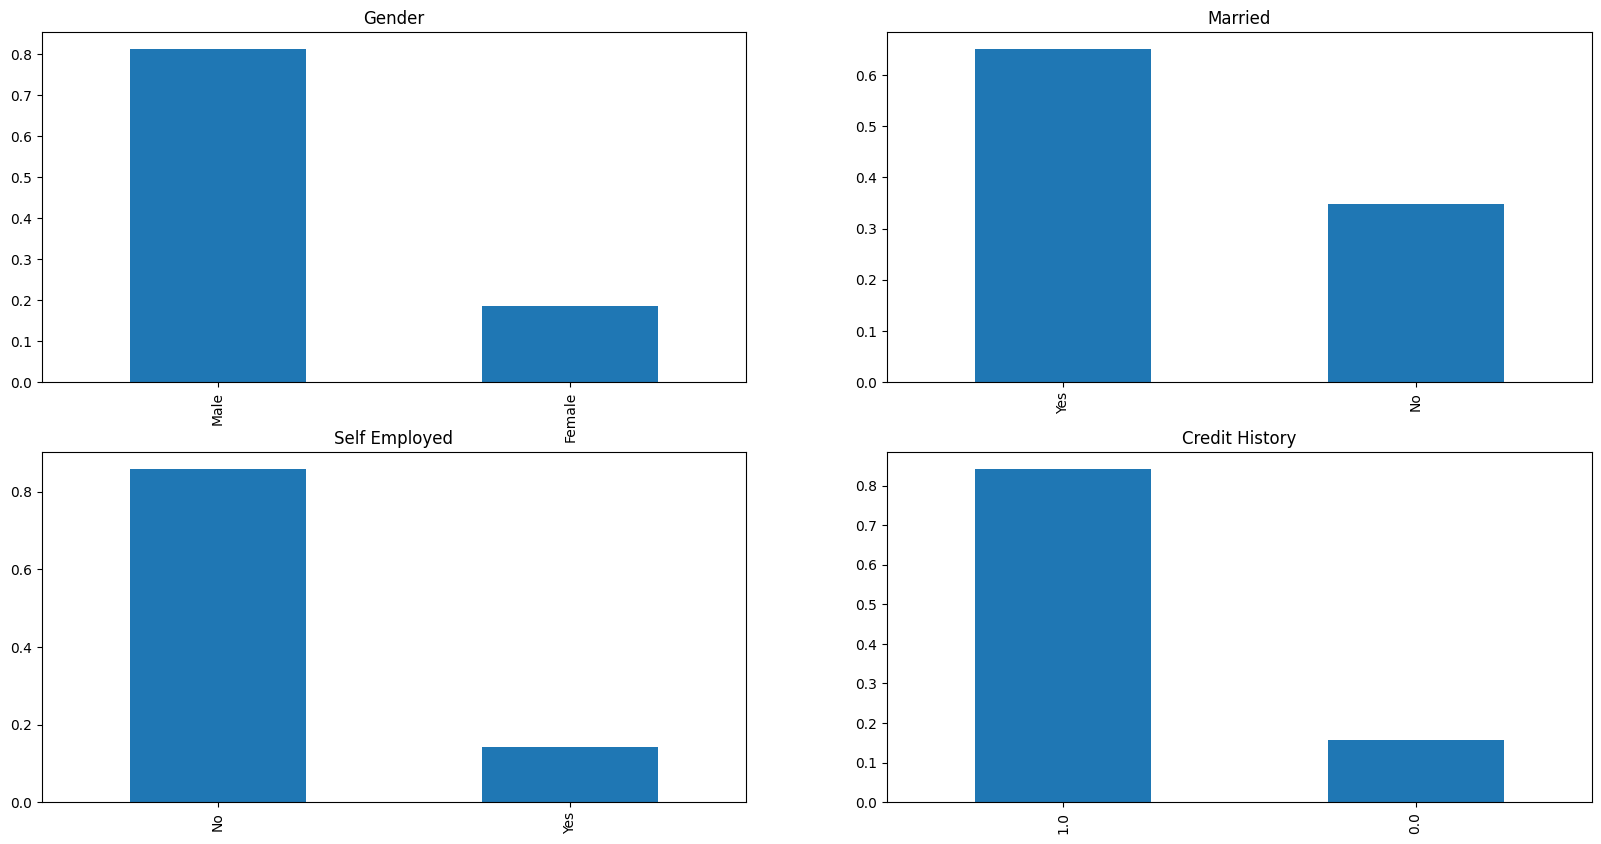

In [ ]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

From the above bar plots:
1. For Gender, 80% applicants in the dataset are male
2. Around 65% of the applicants in the dataset are married
3. 15% of the applicants in the dataset are self employed
4. 85% of the applicants have repaid their debts

## Let's visualize the ordinal variables

<Axes: title={'center': 'Property Area'}>

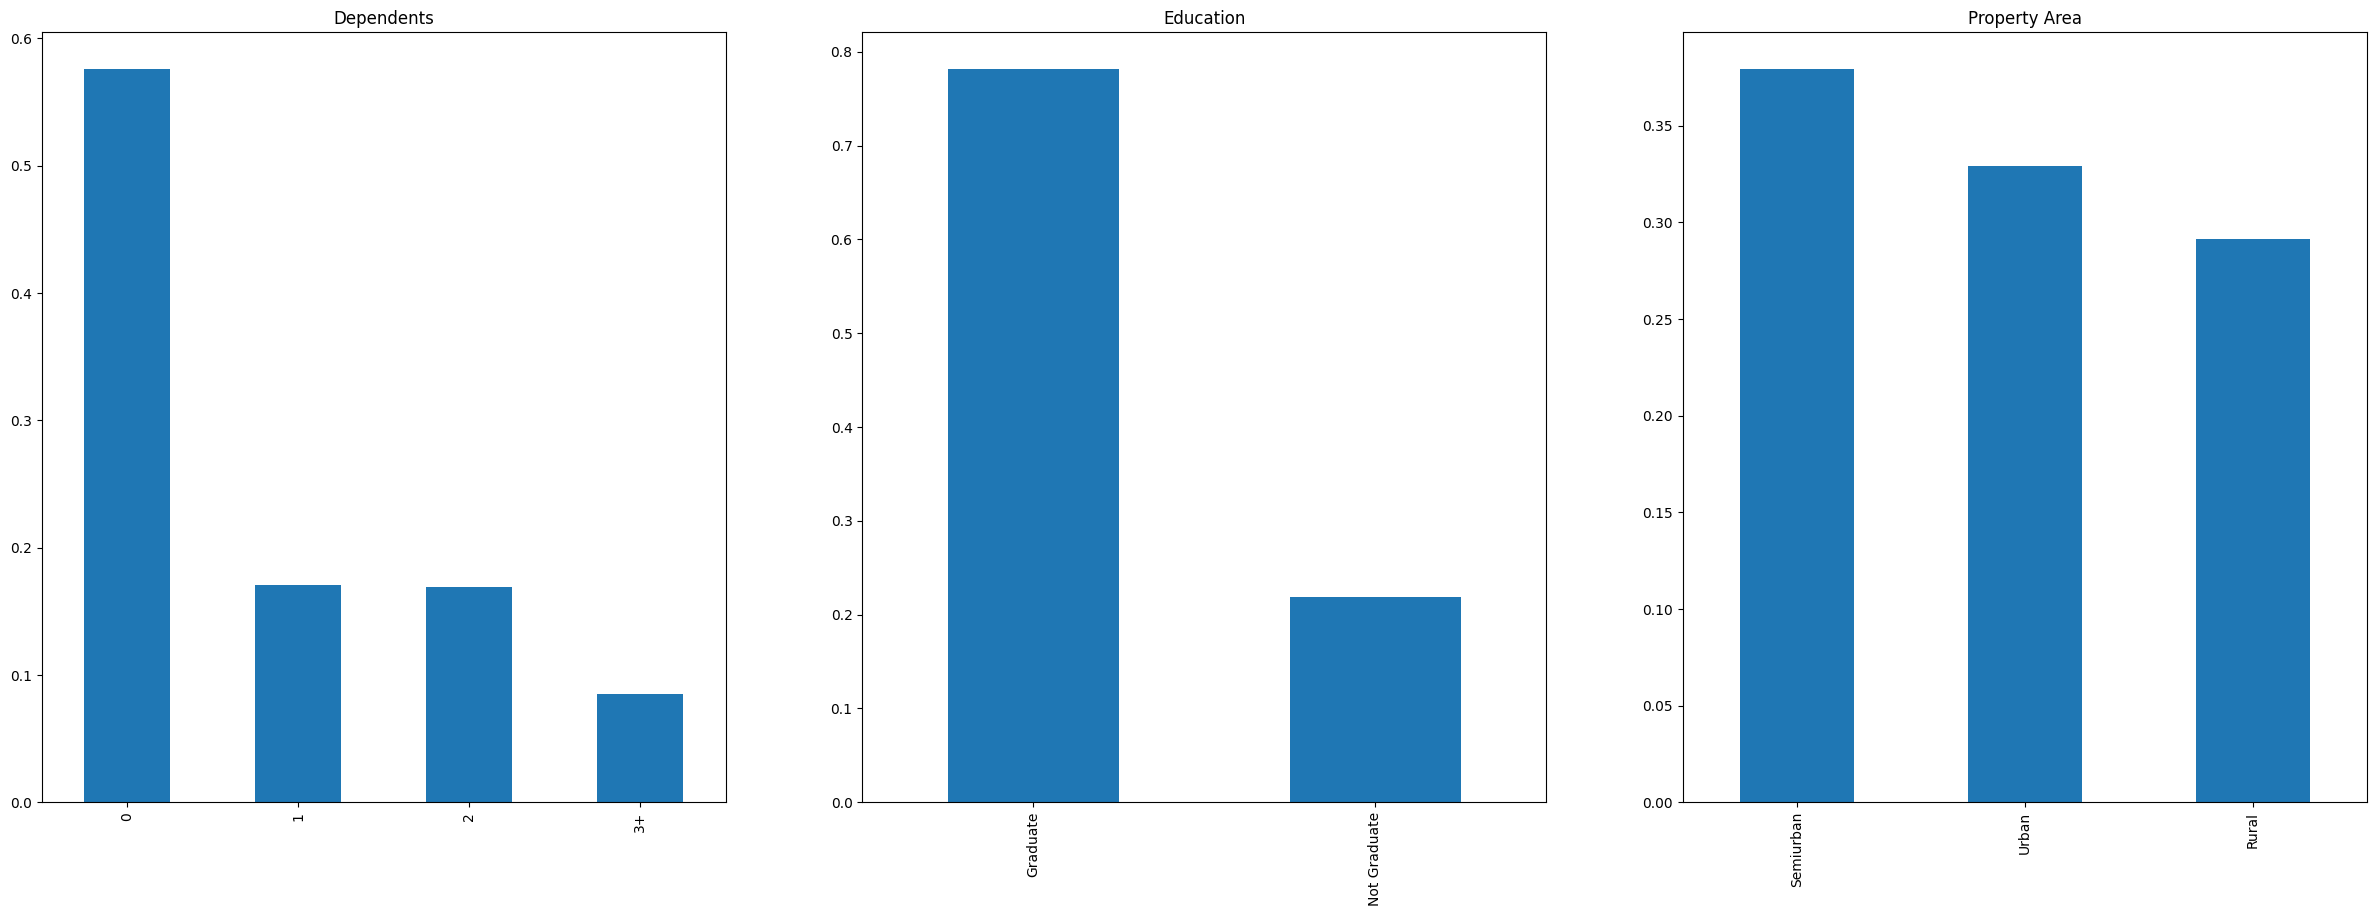

In [ ]:
plt.figure(2)
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize=True).plot(figsize=(30,10),kind='bar',title= 'Dependents')
plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot(kind='bar',title= 'Education')
plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize=True).plot(kind='bar',title= 'Property Area')

From the above bar plots
1. Most of the applicants dont have any dependants
2. Around 80% of the applicants are Graduate
3. Most of the applicants are from semiurban area

## Use the heatmap to visualize the correlation

<ipython-input-14-23ecc3876b0c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = train.corr()


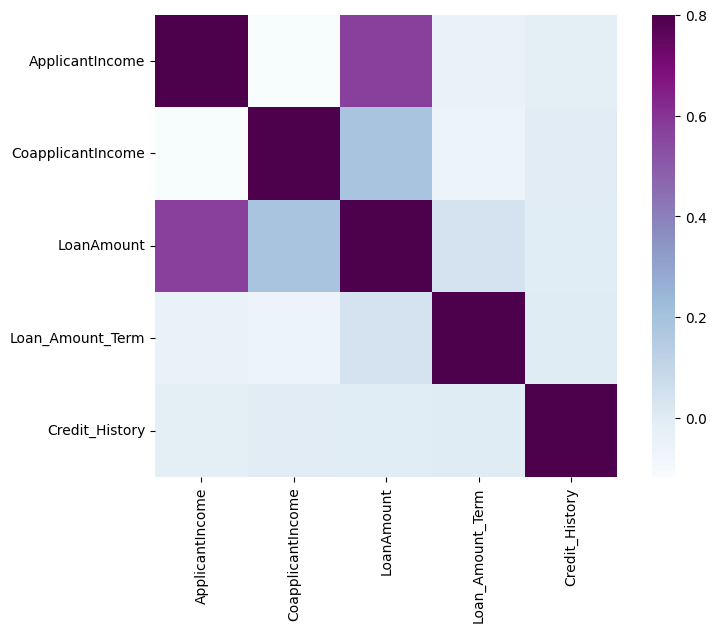

In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

## Missing Value and Handling Outliers

In [ ]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

To fill the missing values, we use:

1. For numerical variables: imputation using mean or median

2. For categorical variables: imputation using mode


In [ ]:
#----------- For Train Data
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

#----------- For Test Data
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [ ]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Model Building

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [ ]:
x = train.drop('Loan_Status',axis=1)
y = train['Loan_Status']

In [ ]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [ ]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
#We will use the train_test_split function from sklearn to divide our train dataset.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
test_original = pd.read_csv("/content/test data.csv")
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3)

## SVM Model

### Linear Kernal

In [ ]:
from sklearn.svm import SVC
sv_lin= SVC(kernel='linear')
sv_model = sv_lin.fit(x_train,y_train)

In [ ]:
svlin_pred_cv = sv_model.predict(x_cv)
svlin_pred_cv

array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y

In [ ]:
print('Accuracy Score: ',accuracy_score(y_cv,svlin_pred_cv))
print('Precision Score: ',precision_score(y_cv,svlin_pred_cv, pos_label='Y'))
print('Recall Score: ',recall_score(y_cv,svlin_pred_cv, pos_label='Y'))
print('F1 Score: ',f1_score(y_cv,svlin_pred_cv, pos_label='Y'))

Accuracy Score:  0.7621621621621621
Precision Score:  0.7484276729559748
Recall Score:  0.967479674796748
F1 Score:  0.8439716312056739


In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits =10)

cv_svlin=cross_val_score(sv_model,x,y,cv = stratified_cv)

mean_cv_svlin= cv_svlin.mean()

print('Mean CV Score: ',mean_cv_svlin)

Mean CV Score:  0.8111581173982021


In [ ]:
#Lets import result from test file.
pred_test = sv_model.predict(test)
submission=pd.read_csv("/content/sample_submission.csv")
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
#Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('sv_linear.csv',index=False)

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_cl = DecisionTreeClassifier()
dt_model = dt_cl.fit(x_train,y_train)

In [ ]:
dt_pred_cv = dt_model.predict(x_cv)
dt_pred_cv

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [ ]:
print('Accuracy Score: ',accuracy_score(y_cv,dt_pred_cv))
print('Precision Score: ',precision_score(y_cv,dt_pred_cv, pos_label='Y'))
print('Recall Score: ',recall_score(y_cv,dt_pred_cv, pos_label='Y'))
print('F1 Score: ',f1_score(y_cv,dt_pred_cv, pos_label='Y'))

Accuracy Score:  0.6810810810810811
Precision Score:  0.7573529411764706
Recall Score:  0.7984496124031008
F1 Score:  0.7773584905660377


In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits =10)

cv_dt=cross_val_score(dt_model,x,y,cv = stratified_cv)

mean_cv_dt = cv_dt.mean()

print('Mean CV Score: ',mean_cv_dt)

Mean CV Score:  0.7216287678476997


In [ ]:
#Lets import result from test file.
pred_test = dt_model.predict(test)
submission=pd.read_csv("/content/sample_submission.csv")
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,N
3,LP001035,Y
4,LP001051,N


In [ ]:
#Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('decisiontree.csv',index=False)

## KNN Model

Text(0, 0.5, 'KNN Accuracy')

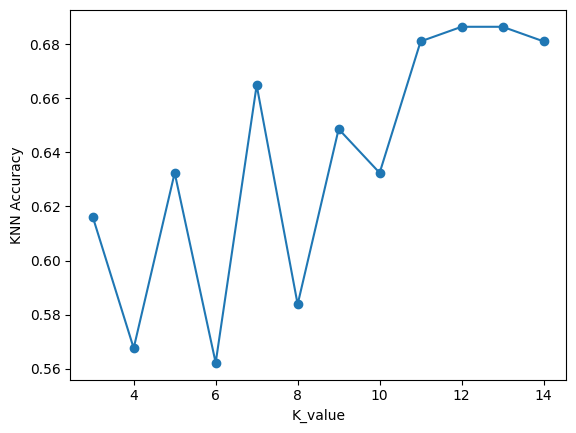

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p = 2)
  knn_model = classifier.fit(x_train,y_train)
  knn_pred_cv  =classifier.predict(x_cv)
  accuracy_knn =  accuracy_score(y_cv,knn_pred_cv)
  metric_k.append(accuracy_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('KNN Accuracy')

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 4 ,metric = 'minkowski',p = 2)
knn_model = classifier.fit(x_train,y_train)
knn_pred_cv = classifier.predict(x_cv)

In [ ]:
print('Accuracy Score: ',accuracy_score(y_cv,knn_pred_cv))
print('Precision Score: ',precision_score(y_cv,knn_pred_cv, pos_label='Y'))
print('Recall Score: ',recall_score(y_cv,knn_pred_cv, pos_label='Y'))
print('F1 Score: ',f1_score(y_cv,knn_pred_cv, pos_label='Y'))

Accuracy Score:  0.5675675675675675
Precision Score:  0.6991869918699187
Recall Score:  0.6666666666666666
F1 Score:  0.6825396825396826


In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits =10)

cv_knn=cross_val_score(knn_model,x,y,cv = stratified_cv)

mean_cv_knn = cv_knn.mean()

print('Mean CV Score: ',mean_cv_knn)

Mean CV Score:  0.5488894764674775


In [ ]:
#Lets import result from test file.
pred_test = knn_model.predict(test)
submission=pd.read_csv("/content/sample_submission.csv")
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,N
3,LP001035,Y
4,LP001051,Y


In [ ]:
#Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('knn.csv',index=False)

## Scaled KNN Model

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fitting scaler on train and test data and transforming it
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_cv)

Text(0, 0.5, 'KNN Accuracy')

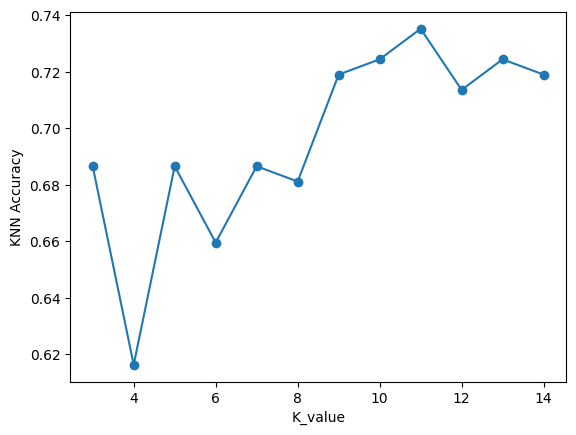

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p = 2)
  knn_model = classifier.fit(x_train_scaled,y_train)
  knn_pred_cv  =classifier.predict(x_test_scaled)
  accuracy_knn =  accuracy_score(y_cv,knn_pred_cv)
  metric_k.append(accuracy_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('KNN Accuracy')

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 4 ,metric = 'minkowski',p = 2)
knn_model = classifier.fit(x_train_scaled,y_train)
knn_pred_cv = classifier.predict(x_test_scaled)

In [ ]:
print('Accuracy Score: ',accuracy_score(y_cv,knn_pred_cv))
print('Precision Score: ',precision_score(y_cv,knn_pred_cv, pos_label='Y'))
print('Recall Score: ',recall_score(y_cv,knn_pred_cv, pos_label='Y'))
print('F1 Score: ',f1_score(y_cv,knn_pred_cv, pos_label='Y'))

Accuracy Score:  0.6162162162162163
Precision Score:  0.7164179104477612
Recall Score:  0.7441860465116279
F1 Score:  0.7300380228136882


In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits =10)

cv_knn=cross_val_score(knn_model,x,y,cv = stratified_cv)

mean_cv_knn = cv_knn.mean()

print('Mean CV Score: ',mean_cv_knn)

Mean CV Score:  0.5488894764674775


In [ ]:
#Lets import result from test file.
pred_test = knn_model.predict(test)
submission=pd.read_csv("/content/sample_submission.csv")
submission.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y


In [ ]:
#Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('knnscaled.csv',index=False)

## Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log_model = log.fit(x_train, y_train)

In [ ]:
y_pred_log = log_model.predict(x_cv)
y_pred_log

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [ ]:
print('Accuracy Score: ',accuracy_score(y_cv,y_pred_log))
print('Precision Score: ',precision_score(y_cv,y_pred_log, pos_label='Y'))
print('Recall Score: ',recall_score(y_cv,y_pred_log, pos_label='Y'))
print('F1 Score: ',f1_score(y_cv,y_pred_log, pos_label='Y'))

Accuracy Score:  0.7837837837837838
Precision Score:  0.7664670658682635
Recall Score:  0.9922480620155039
F1 Score:  0.8648648648648649


In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits =10)

cv_log=cross_val_score(log_model,x,y,cv = stratified_cv)

mean_cv_log = cv_log.mean()

print('Mean CV Score: ',mean_cv_log)

Mean CV Score:  0.801427815970386


In [ ]:
#Lets import result from test file.
pred_test = log_model.predict(test)
submission=pd.read_csv("/content/sample_submission.csv")
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
#Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv',index=False)

## Scaled Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log_model = log.fit(x_train_scaled, y_train)

In [ ]:
y_pred_log = log_model.predict(x_test_scaled)
y_pred_log

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [ ]:
print('Accuracy Score: ',accuracy_score(y_cv,y_pred_log))
print('Precision Score: ',precision_score(y_cv,y_pred_log, pos_label='Y'))
print('Recall Score: ',recall_score(y_cv,y_pred_log, pos_label='Y'))
print('F1 Score: ',f1_score(y_cv,y_pred_log, pos_label='Y'))

Accuracy Score:  0.8
Precision Score:  0.7771084337349398
Recall Score:  1.0
F1 Score:  0.8745762711864408


In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits =10)

cv_log=cross_val_score(log_model,x,y,cv = stratified_cv)

mean_cv_log = cv_log.mean()

print('Mean CV Score: ',mean_cv_log)

Mean CV Score:  0.801427815970386


In [ ]:
#Lets import result from test file.
pred_test = log_model.predict(test)
submission=pd.read_csv("/content/sample_submission.csv")
submission.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
#Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logisticscaled.csv',index=False)